In [48]:
pip install pyarrow


In [49]:
import pandas as pd


In [50]:
df= pd.read_csv("dataset\synthetic_logs.csv")

In [51]:
df.head()

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert


In [52]:
df.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

In [53]:
df.target_label.unique()

array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage', 'User Action',
       'Workflow Error', 'Deprecation Warning'], dtype=object)

In [54]:
pip install sentence-transformers scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.



Cluster 0:

0    nova.osapi_compute.wsgi.server [req-b9718cd8-f...
3    nova.osapi_compute.wsgi.server [req-4895c258-b...
4    nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...
5    nova.osapi_compute.wsgi.server [req-f0bffbc3-5...
9    nova.osapi_compute.wsgi.server [req-2bf7cfee-a...
Name: log_message, dtype: object

Cluster 1:

1        Email service experiencing issues with sending
10             Email server encountered a sending fault
217          Mail service encountered a delivery glitch
248    Service disruption caused by email sending error
265           Email system had a problem sending emails
Name: log_message, dtype: object

Cluster 2:

2               Unauthorized access to data was attempted
1410          An unusual data access attempt was detected
1426    Identified a possible unauthorized data access...
Name: log_message, dtype: object

Cluster 3:

6              Shard 6 replication task ended in failure
45     Data replication task for shard 14 did not com...
98    

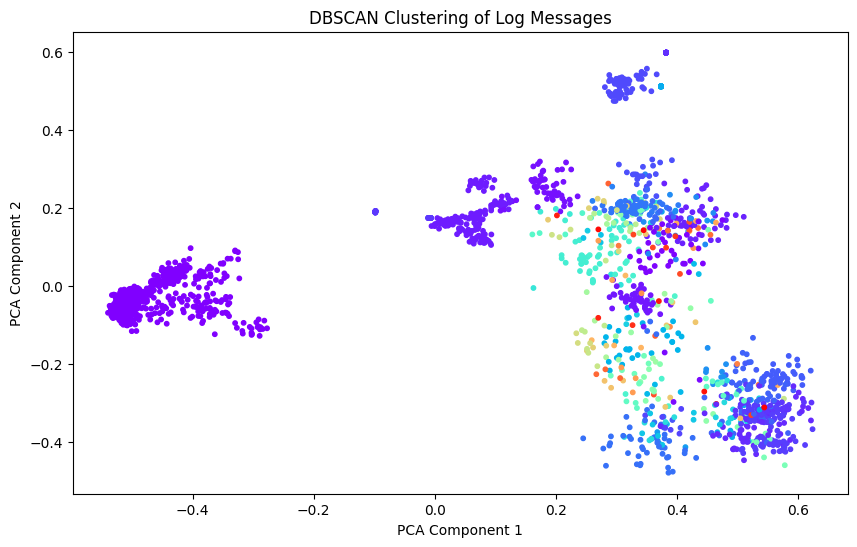

In [55]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming the log messages are in a column named 'log' or 'message'
log_column = "log_message"  # <-- change this if your column is named differently
log_messages = df[log_column].astype(str).tolist()

# Step 1: Generate Sentence Embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(log_messages)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=1, metric="cosine")
labels = dbscan.fit_predict(embeddings)

# Step 3: Add results to DataFrame
df['cluster'] = labels

# Optional: Print some clustered logs
for cluster_id in set(labels):
    print(f"\nCluster {cluster_id}:\n")
    print(df[df['cluster'] == cluster_id][log_column].head(5))

# Optional: Plot clusters using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap="rainbow", s=10)
plt.title("DBSCAN Clustering of Log Messages")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [56]:
# embeddings = model.encode(log_messages)

print(embeddings[:2])


[[-1.02939621e-01  3.35459411e-02 -2.20260732e-02  1.55101740e-03
  -9.86917876e-03 -1.78956270e-01 -6.34409785e-02 -6.01761639e-02
   2.81109158e-02  5.99620491e-02 -1.72618348e-02  1.43363548e-03
  -1.49560034e-01  3.15287686e-03 -5.66030927e-02  2.71685235e-02
  -1.49891041e-02 -3.54037657e-02 -3.62936445e-02 -1.45410765e-02
  -5.61491773e-03  8.75539035e-02  4.55120578e-02  2.50963885e-02
   1.00187510e-02  1.24267349e-02 -1.39923573e-01  7.68696293e-02
   3.14095505e-02 -4.15247958e-03  4.36902344e-02  1.71250012e-02
  -8.00951198e-02  5.74006326e-02  1.89091656e-02  8.55262503e-02
   3.96398641e-02 -1.34371817e-01 -1.44360063e-03  3.06704035e-03
   1.76854044e-01  4.44885530e-03 -1.69274509e-02  2.24266481e-02
  -4.35049310e-02  6.09034160e-03 -9.98169929e-03 -6.23972900e-02
   1.07372422e-02 -6.04895083e-03 -7.14660808e-02 -8.45799781e-03
  -3.18019874e-02 -1.00518376e-01  2.25873096e-04 -1.89341009e-02
  -3.17793973e-02  4.00860943e-02  2.19178163e-02 -2.59528961e-02
   5.84525

In [57]:
print(embeddings.shape)

(2410, 384)


In [58]:
df.head()

,timestamp,source,log_message,target_label,complexity,cluster
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0


In [59]:
df[df.cluster==5]

,timestamp,source,log_message,target_label,complexity,cluster
8,2025-02-12 10:42:29,ThirdPartyAPI,nova.compute.claims [req-a07ac654-8e81-416d-bf...,Resource Usage,bert,5
26,2025-03-03 17:11:11,ModernCRM,nova.compute.claims [req-d6986b54-3735-4a42-90...,Resource Usage,bert,5
40,2025-06-19 21:42:34,ThirdPartyAPI,nova.compute.claims [req-72b4858f-049e-49e1-b3...,Resource Usage,bert,5
58,2025-09-13 14:45:14,AnalyticsEngine,nova.compute.claims [req-5c8f52bd-8e3c-41f0-95...,Resource Usage,bert,5
61,2025-04-27 11:18:18,ThirdPartyAPI,nova.compute.claims [req-d38f479d-9bb9-4276-96...,Resource Usage,bert,5
...,...,...,...,...,...,...
2336,2025-12-10 11:53:33,AnalyticsEngine,nova.compute.claims [req-97fcea79-42f7-4241-9b...,Resource Usage,bert,5
2345,2025-12-22 01:38:48,BillingSystem,nova.compute.claims [req-caeb3818-dab6-4e8d-9e...,Resource Usage,bert,5
2352,2025-02-18 00:16:44,ModernCRM,nova.compute.claims [req-98474cd9-61e1-4afe-bd...,Resource Usage,bert,5
2355,2025-11-28 18:03:55,BillingSystem,nova.compute.claims [req-6f9ecdfe-481c-4535-9b...,Resource Usage,bert,5


In [60]:
from collections import Counter

# Step 1: Count number of records in each cluster
cluster_counts = Counter(df['cluster'])

# Step 2: Sort clusters by number of records (descending)
sorted_clusters = sorted(cluster_counts.items(), key=lambda x: x[1], reverse=True)

# Step 3: Print 5 messages for clusters with more than 10 records
print("\nClusters with more than 10 log messages:\n")
for cluster_id, count in sorted_clusters:
    if count > 10 and cluster_id != -1:  # exclude noise (-1 is noise in DBSCAN)
        print(f"\nCluster {cluster_id} — {count} records:\n")
        print(df[df['cluster'] == cluster_id][log_column].head(5).to_string(index=False))



Clusters with more than 10 log messages:


Cluster 0 — 1017 records:

nova.osapi_compute.wsgi.server [req-b9718cd8-f6...
nova.osapi_compute.wsgi.server [req-4895c258-b2...
nova.osapi_compute.wsgi.server [req-ee8bc8ba-92...
nova.osapi_compute.wsgi.server [req-f0bffbc3-5a...
nova.osapi_compute.wsgi.server [req-2bf7cfee-a2...

Cluster 5 — 147 records:

nova.compute.claims [req-a07ac654-8e81-416d-bfb...
nova.compute.claims [req-d6986b54-3735-4a42-907...
nova.compute.claims [req-72b4858f-049e-49e1-b31...
nova.compute.claims [req-5c8f52bd-8e3c-41f0-95a...
nova.compute.claims [req-d38f479d-9bb9-4276-968...

Cluster 11 — 100 records:

User User685 logged out.
 User User395 logged in.
 User User225 logged in.
User User494 logged out.
 User User900 logged in.

Cluster 13 — 86 records:

Backup started at 2025-05-14 07:06:55.
Backup started at 2025-02-15 20:00:19.
  Backup ended at 2025-08-08 13:06:23.
Backup started at 2025-11-14 08:27:43.
Backup started at 2025-12-09 10:19:11.

Cluster 7 — 60 r

In [61]:
import re

def extract_log_info(log_message):
    patterns = [
        {
            "type": "account_creation",
            "regex": r"Account with ID (\d+) created by User(\d+)",
        },
        {
            "type": "user_login",
            "regex": r"User User(\d+) logged in\.",
        },
        {
            "type": "user_logout",
            "regex": r"User User(\d+) logged out\.",
        },
        {
            "type": "backup_started",
            "regex": r"Backup started at ([\d\- :]+)\.",
        },
        {
            "type": "backup_completed",
            "regex": r"Backup completed successfully\.",
        },
        {
            "type": "system_update",
            "regex": r"System updated to version ([\d\.]+)\.",
        },
        {
            "type": "login_failures",
            "regex": r"(Multiple|Unauthorized|Incorrect|Failure).*login.*user\s*\d+",
        },
        {
            "type": "file_upload",
            "regex": r"File (\S+\.csv) uploaded successfully by user \d+\.",
        },
        {
            "type": "system_error",
            "regex": r"Critical system.*component.*",
        },
        {
            "type": "api_security",
            "regex": r"User \d+.*API.*unauthorized|security.*",
        },
    ]

    for pattern in patterns:
        match = re.search(pattern["regex"], log_message, re.IGNORECASE)
        if match:
            return {
                "log_type": pattern["type"],
                "matches": match.groups()
            }

    return None
    


In [62]:

log = "Account with ID 5351 created by User634."
result = extract_log_info(log)
print(result)


{'log_type': 'account_creation', 'matches': ('5351', '634')}


In [63]:
df['regex_label'] = df['log_message'].apply(extract_log_info)
df[df.regex_label.isna()]
# df[df.regex_label.notnull()]

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0,None
...,...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,0,None
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,7,None
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,0,None
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1,None


In [64]:
df_non_regex= df[df['regex_label'].isnull()].copy();
df_non_regex.shape

(1978, 7)

In [65]:
# Group by the target column and count rows
target_counts = df_non_regex['target_label'].value_counts()

# Filter targets that appear 5 or fewer times
rare_targets = target_counts[target_counts <= 5]

# Print those target labels and their counts
print("Target labels with 5 or fewer rows:")
print(rare_targets)


Target labels with 5 or fewer rows:
target_label
Workflow Error         4
Deprecation Warning    3
Name: count, dtype: int64


In [66]:
df_non_legacy = df_non_regex[df_non_regex.source != 'LegacyCRM']
df_non_legacy.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI'], dtype=object)

In [67]:
filtered_embeddings = model.encode(df_non_legacy['log_message'].tolist())
filtered_embeddings[:2]

array([[-1.02939621e-01,  3.35459411e-02, -2.20260732e-02,
         1.55101740e-03, -9.86917876e-03, -1.78956270e-01,
        -6.34409785e-02, -6.01761639e-02,  2.81109158e-02,
         5.99620491e-02, -1.72618348e-02,  1.43363548e-03,
        -1.49560034e-01,  3.15287686e-03, -5.66030927e-02,
         2.71685235e-02, -1.49891041e-02, -3.54037657e-02,
        -3.62936445e-02, -1.45410765e-02, -5.61491773e-03,
         8.75539035e-02,  4.55120578e-02,  2.50963885e-02,
         1.00187510e-02,  1.24267349e-02, -1.39923573e-01,
         7.68696293e-02,  3.14095505e-02, -4.15247958e-03,
         4.36902344e-02,  1.71250012e-02, -8.00951198e-02,
         5.74006326e-02,  1.89091656e-02,  8.55262503e-02,
         3.96398641e-02, -1.34371817e-01, -1.44360063e-03,
         3.06704035e-03,  1.76854044e-01,  4.44885530e-03,
        -1.69274509e-02,  2.24266481e-02, -4.35049310e-02,
         6.09034160e-03, -9.98169929e-03, -6.23972900e-02,
         1.07372422e-02, -6.04895083e-03, -7.14660808e-0

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Define features and target
X = filtered_embeddings
y = df_non_legacy['target_label']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Train Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model_lr.predict(X_test)

# Step 5: Print classification report
print(classification_report(y_test, y_pred))


                     precision    recall  f1-score   support

     Critical Error       0.96      0.96      0.96        26
              Error       0.97      0.97      0.97        36
        HTTP Status       1.00      1.00      1.00       203
     Resource Usage       1.00      1.00      1.00        36
     Security Alert       0.98      0.98      0.98        53
System Notification       1.00      1.00      1.00        41

           accuracy                           0.99       395
          macro avg       0.99      0.99      0.99       395
       weighted avg       0.99      0.99      0.99       395



In [70]:
import os
import joblib

# Create the directory if it doesn't exist
os.makedirs("../models", exist_ok=True)

# Save the model
joblib.dump(model_lr, "../models/log_classifier.joblib")


['../models/log_classifier.joblib']